In [1]:
# Importo pandas per i dati e seaborn per i grafici
import pandas as pd
import seaborn as sns

# URL del file CSV grezzo (raw) su GitHub
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

# Il codice ora legge il file direttamente da internet, non serve averlo sul computer.
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])

print("Dataset caricato con successo da GitHub.")

Dataset caricato.


In [2]:
#ANALISI ESPLORATIVA (EDA)
print("EDA: Ispezione Iniziale")

# 1. Mostro le dimensioni del dataset
print(f"\nIl dataset ha {df.shape[0]} righe e {df.shape[1]} colonne.")

# 2. Mostro le prime righe per vedere la struttura
print("\nPrime 5 righe del dataset:")
df.head()

EDA: Ispezione Iniziale

Il dataset ha 429435 righe e 67 colonne.

Prime 5 righe del dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
print("EDA: Tipi di dati e controllo aggregati")

# 3. Informazioni generali sulle colonne
print("\nInformazioni sulle colonne:")
df.info()

# 4. Cerco le 'location' che sono aggregati e non nazioni
print("\nControllo le 'location' che non hanno un continente associato:")
locations_senza_continente = df[df['continent'].isnull()]['location'].unique()
print(locations_senza_continente)
print("\nQuesti non sono paesi singoli. Da tenere in cosiderazione per le successive analisi.")

EDA: Tipi di dati e controllo aggregati

Informazioni sulle colonne:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_d

In [4]:
#Analisi per Continente
print("Casi totali e percentuali per continente")

# Isolo i dati più recenti per ogni location
latest_data = df.sort_values('date').drop_duplicates('location', keep='last')

# Calcolo i casi per ogni continente
continent_list = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
continent_cases = latest_data[latest_data['location'].isin(continent_list)][['location', 'total_cases']]
continent_cases = continent_cases.rename(columns={'location': 'continent'})
print("\nCasi totali per continente:")
print(continent_cases.to_string(index=False))

# Calcolo la percentuale sul totale mondiale
world_total_cases = latest_data[latest_data['location'] == 'World']['total_cases'].iloc[0]
continent_cases['percentage_of_world_total'] = (continent_cases['total_cases'] / world_total_cases) * 100
print("\nPercentuale dei casi per continente:")
print(continent_cases[['continent', 'percentage_of_world_total']].to_string(index=False, float_format='%.2f%%'))

Casi totali e percentuali per continente

Casi totali per continente:
    continent  total_cases
North America  124492666.0
       Africa   13145380.0
South America   68809418.0
      Oceania          NaN
       Europe          NaN
         Asia          NaN

Percentuale dei casi per continente:
    continent  percentage_of_world_total
North America                        NaN
       Africa                        NaN
South America                        NaN
      Oceania                        NaN
       Europe                        NaN
         Asia                        NaN


Grafico sull'evoluzione dei casi totali in Italia (2022)


<Axes: xlabel='date', ylabel='total_cases'>

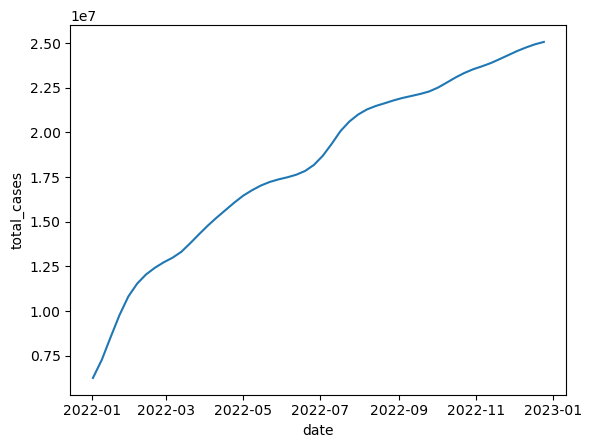

In [5]:
#Analisi Italia 2022
print("Grafico sull'evoluzione dei casi totali in Italia (2022)")

# Filtro i dati che mi servono per il grafico
italy_2022_weekly = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022) & (df['new_cases'] > 0)].copy()

# Creo il grafico a linea con seaborn
sns.lineplot(data=italy_2022_weekly, x='date', y='total_cases')

<Axes: xlabel='date', ylabel='new_cases'>

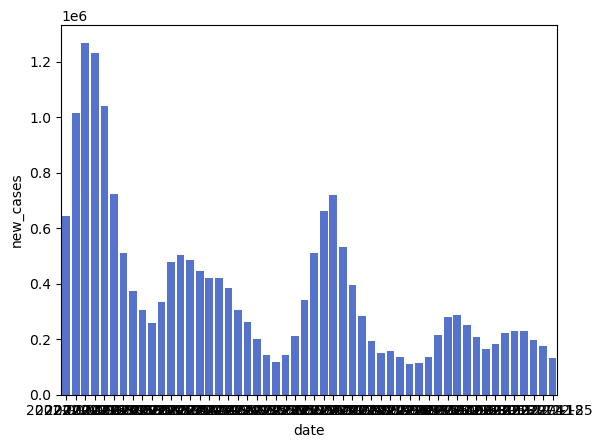

In [6]:
#Grafico sui nuovi casi settimanali in Italia (2022)

# Creo il grafico a barre con seaborn
sns.barplot(data=italy_2022_weekly, x='date', y='new_cases', color='royalblue')

<Axes: xlabel='location', ylabel='icu_patients'>

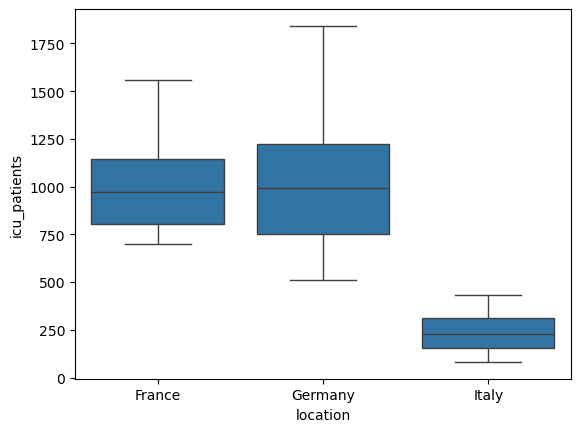

In [7]:
#Confronto pazienti in terapia intensiva

# Filtro i dati per nazioni e periodo richiesto
countries_icu = df[df['location'].isin(['Italy', 'Germany', 'France'])]
start_date_icu = '2022-05-01'
end_date_icu = '2023-04-30'
icu_period = countries_icu[(countries_icu['date'] >= start_date_icu) & (countries_icu['date'] <= end_date_icu)]

# Creo il boxplot con seaborn
sns.boxplot(data=icu_period, x='location', y='icu_patients')


Somma dei pazienti ospedalizzati giornalieri per nazione nel 2021:
  location  hosp_patients
0   France      6008717.0
2    Italy      4419950.0
3    Spain      2411706.0
1  Germany            0.0


<Axes: xlabel='location', ylabel='hosp_patients'>

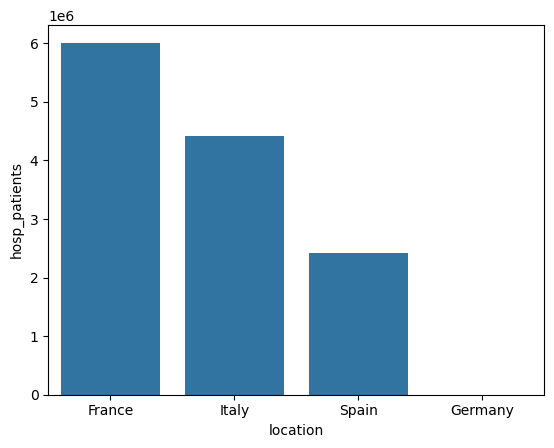

In [8]:
# Analisi pazienti ospedalizzati nel 2021

# Filtro i dati per nazioni e anno
countries_hosp = df[df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])]
hosp_2021 = countries_hosp[countries_hosp['date'].dt.year == 2021]

# Calcolo la somma e la mostro numericamente
total_hosp_2021 = hosp_2021.groupby('location')['hosp_patients'].sum().reset_index().sort_values('hosp_patients', ascending=False)
print("\nSomma dei pazienti ospedalizzati giornalieri per nazione nel 2021:")
print(total_hosp_2021)

# Mostro il grafico a barre con seaborn
sns.barplot(data=total_hosp_2021, x='location', y='hosp_patients')

In [12]:
#Commento sui dati nulli
# Controllo i dati nulli
print("\nControllo dati nulli per i pazienti ospedalizzati nel 2021:")
null_hosp = hosp_2021.groupby('location')['hosp_patients'].apply(lambda x: x.isnull().sum())
print(null_hosp)

print("\nCommento sui dati nulli:")
print("I dati per la Germania sono completamente assenti nel 2021. Non possiamo sostituirli, perché inventeremmo dei dati falsando l'analisi. È però importante notare questa mancanza.")


Controllo dati nulli per i pazienti ospedalizzati nel 2021:
location
France       0
Germany    365
Italy        0
Spain        0
Name: hosp_patients, dtype: int64

Commento sui dati nulli:
I dati per la Germania sono completamente assenti nel 2021. Non possiamo sostituirli, perché inventeremmo dei dati falsando l'analisi. È però importante notare questa mancanza.
